# **Introduction to Machine Learning**

In this lecture, we plan to cover some of the machine learning principles and one or two algorithms.  


---
## Loading libraries 
---

In [1]:
# Loading the basic packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the machine learning packages 
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

---
## Visualizing overfitting
---

In [17]:
# Loading the candy data from an url
candy_data = pd.read_csv('candy-data.csv')

In [18]:
# Printing the first few rows of the candy data 
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [19]:
# Extracting the features and label
X = candy_data.drop(['winpercent', 'competitorname'], axis = 1)
y = candy_data['winpercent']

In [20]:
# Splitting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

# Instantiating the classifier 
rfr = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_features=4)

# Fitting the instantiator 
rfr.fit(X_train, y_train)

# Printing the training and testing accuracies 
print('The training error is {0:.2f}'.format(mean_absolute_error(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mean_absolute_error(y_test, rfr.predict(X_test))))

The training error is 3.99
The testing error is 8.57


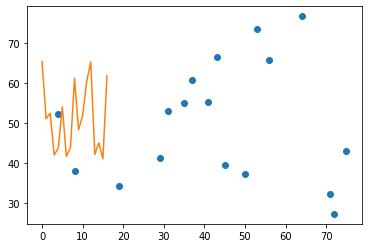

In [21]:
plt.plot(y_test, 'o')
plt.plot(rfr.predict(X_test))

---
## Visualizing the effect of parameter tuning

---

In [22]:
# Loading the tic_tac data from an url 
tic_tac_data = pd.read_csv('tic-tac-toe_csv.csv')

# Printing the dimensions of tic tac data 
tic_tac_data.shape

(958, 10)

In [23]:
# Printing the first few rows of the tic tac data
tic_tac_data.head()
# Observe the column named class 

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [24]:
# Renaming the class column as target 
tic_tac_data.rename(columns={'class': 'target'}, inplace=True)
# class is a reserved word

In [25]:
# Printing the head of the tic tac data 
tic_tac_data.head()
# Observe the class is renamed as target 

,TL,TM,TR,ML,MM,MR,BL,BM,BR,target
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [26]:
# Creating a mapping for x and o in the tic tac data 
mapping_for_moves = {'x':1, "o":0}  # For b, we put mean of the data

# Counting the unique values in target column 
tic_tac_data.target.value_counts()

True     626
False    332
Name: target, dtype: int64

In [27]:
# Labelling the values of target column 
tic_tac_data.target = tic_tac_data.target.apply(lambda x: 0 if x==False else 1)

pd.set_option('display.max_rows', None)

# Counting the unique values in target column
tic_tac_data.target.value_counts()

1    626
0    332
Name: target, dtype: int64

In [28]:
# # Extracting the label and the features 
y = tic_tac_data['target']
tic_tac_data = tic_tac_data.drop(['target'],axis=1)

In [29]:
# Creating a mapping for  tic tac data 
for i in tic_tac_data.columns:
  tic_tac_data[i] = tic_tac_data[i].map(mapping_for_moves)

In [30]:
# Printing the head of the tic tac data 
tic_tac_data.head()
# Observe the 0,1 and NaN in the tic tac data 

,TL,TM,TR,ML,MM,MR,BL,BM,BR
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
4,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,NaN


In [31]:
# Imputing the missing values in the features 
X = SimpleImputer().fit_transform(tic_tac_data)

In [32]:
# Splitting the tic tac data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

In [33]:
from sklearn.metrics import accuracy_score

test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:

    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train) # print(rfc)

    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)

    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))
# plot the loss as well 

The training scores were: [0.94, 0.95, 0.98, 0.99, 0.99, 1.0, 1.0, 1.0]
The testing scores were: [0.8, 0.8, 0.9, 0.91, 0.93, 0.96, 0.98, 1.0]


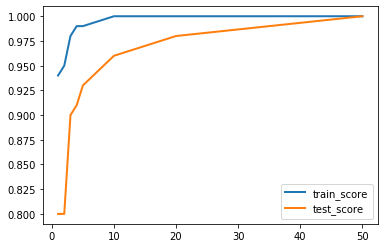

In [34]:
z = [1, 2, 3, 4, 5, 10, 20, 50]
plt.plot(z, train_scores, linewidth=2)
plt.plot(z, test_scores, linewidth=2)
plt.legend(['train_score', 'test_score'], loc='lower right')

---
## Visualizing the effect of feature normalization 
---

In [35]:
data_set = pd.read_csv('toy_data.csv') 
data_set.head() 

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,1000,Yes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8F7D041C8>,
      dtype=object)

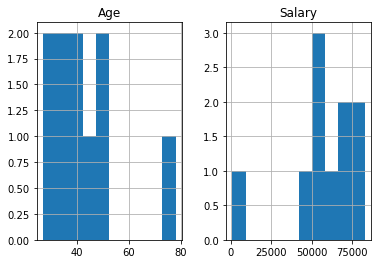

In [36]:
data_set.hist()

In [37]:
from sklearn import preprocessing 

# here Features - Age and Salary columns  
# are taken using slicing 
# to handle values with varying magnitude 
x = data_set.iloc[:, 1:3].values 
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
x_after_min_max_scaler = min_max_scaler.fit_transform(x) 
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler) 


After min max Scaling : 
 [[0.33333333 0.86585366]
 [0.         0.57317073]
 [0.05882353 0.64634146]
 [0.21568627 0.73170732]
 [0.25490196 0.        ]
 [0.15686275 0.69512195]
 [1.         0.62195122]
 [0.41176471 0.95121951]
 [0.45098039 1.        ]
 [0.19607843 0.80487805]]


In [38]:
Standardisation = preprocessing.StandardScaler() 
x_after_Standardisation = Standardisation.fit_transform(x) 
print ("\nAfter Standardisation : \n", x_after_Standardisation) 


After Standardisation : 
 [[ 0.09536935  0.66527061]
 [-1.15176827 -0.43586695]
 [-0.93168516 -0.16058256]
 [-0.34479687  0.16058256]
 [-0.1980748  -2.59226136]
 [-0.56487998  0.02294037]
 [ 2.58964459 -0.25234403]
 [ 0.38881349  0.98643574]
 [ 0.53553557  1.16995867]
 [-0.41815791  0.43586695]]


## Extreme Gradient Boosting with XGBoost

--- 
### Using XGBoost for classification
---

In [40]:
# Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

In [41]:
# Printing the columns of the data 
diabetes_data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [42]:
# Printing the shape of the data 
diabetes_data.shape

(768, 9)

In [43]:
# Print the first few rows of the data 
diabetes_data.head(4)
# diabetes_data.iloc[[50,100,150]]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [44]:
# Printing the types of data in the dataset 
print(diabetes_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [45]:
# Checking for missing values
print(diabetes_data.isna().sum())

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64


In [46]:
# Finding the number of distinct classes
diabetes_data.diabetes.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

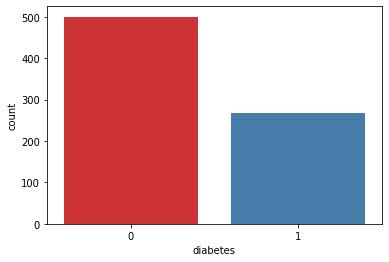

In [47]:
# Plotting the value counts in Customer_Segment
sns.countplot(diabetes_data['diabetes'], palette='Set1')
plt.show()
# plt.savefig('value-count.png')
# class imbalance case here

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8F7E804C8>,
      dtype=object)

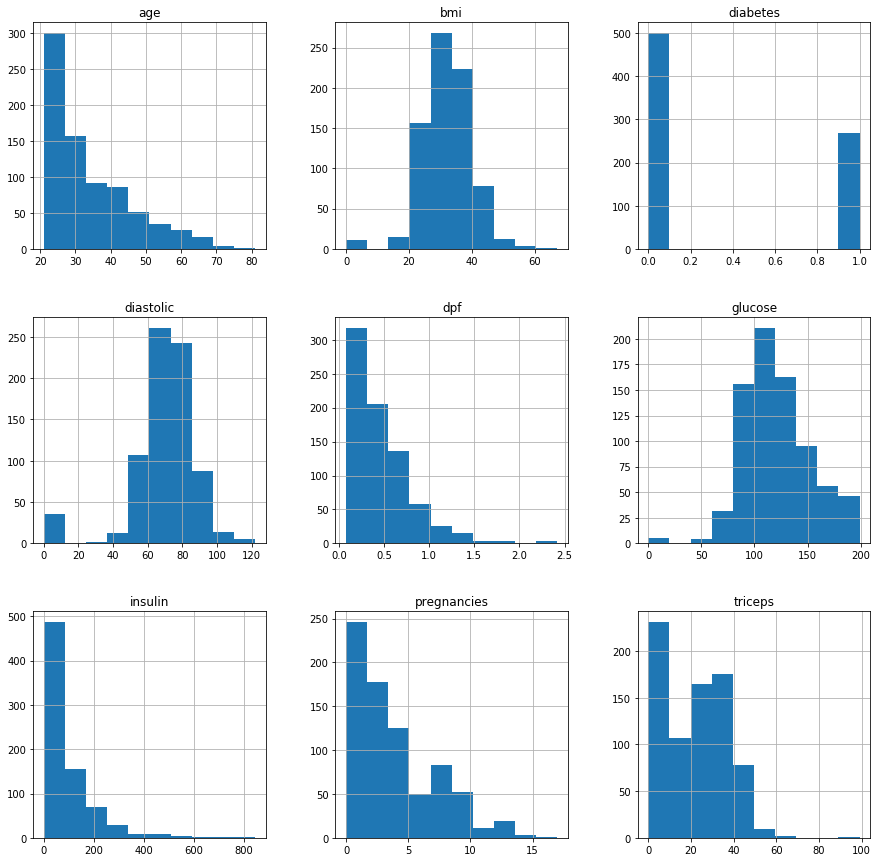

In [48]:
diabetes_data.hist(figsize=(15,15))

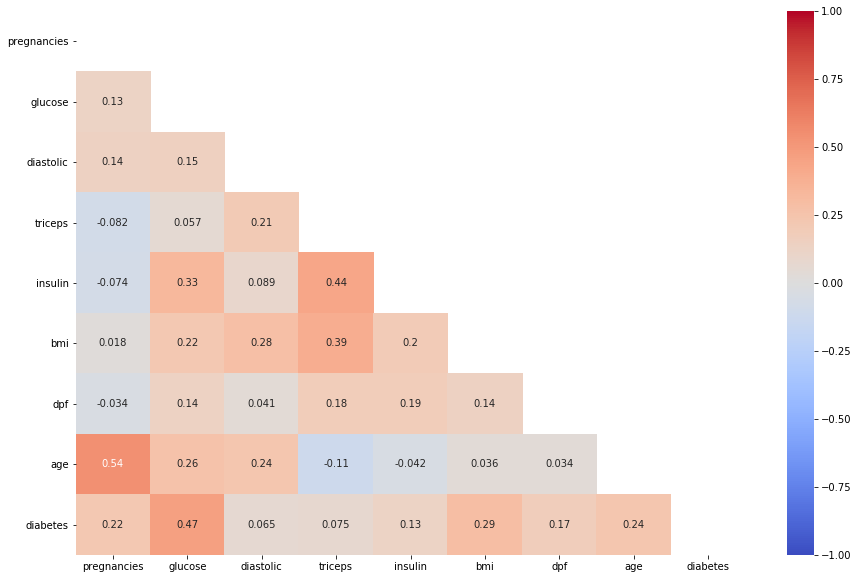

In [49]:
# Visualizing the correlation matrix 
plt.figure(figsize=(15,10))
mask = np.zeros_like(diabetes_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(diabetes_data.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
plt.savefig('corr-matrix.png')
plt.show()

In [50]:
# separate the labels and the features - method 1 
label = diabetes_data['diabetes']
features_df = diabetes_data.drop(['diabetes'], axis=1)

In [51]:
# # Applying scaling on the features 
ss = StandardScaler()
features_df = ss.fit_transform(features_df)

In [52]:
# split data into X and y
X_train, X_test, y_train, y_test = train_test_split(features_df, label, train_size=0.8, random_state=123)

In [53]:
# Instantiating the classifier and fitting it 
xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [54]:
# Applying classifier on train (seen) set
predictions = xgb_clf.predict(X_train)
# accuracy score
accuracy = accuracy_score(y_train, predictions)
print(np.round(accuracy*100, 2), '%')

80.62 %


In [55]:
# Applying classifier on test (unseen) set
predictions = xgb_clf.predict(X_test)
# accuracy score
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

77.27 %


In [56]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))
# plot roc auc

[[86 10]
 [25 33]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        96
           1       0.77      0.57      0.65        58

    accuracy                           0.77       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



--- 
### Demystifying classification report 
---



* Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$

* Precision = $\frac{TP}{TP + FP}$

* Recall = $\frac{TP}{TP + FN}$

* f1-score = $\frac{2 * Recall * Precision}{Recall + Precision}$

---
### Plotting an ROC curve
----
A Receiver Operating Characteristic (ROC) curve is a graph with the x-axis values as the **False Positive Rate** (FPR) and the y-axis values as the **True Positive Rate** (TPR). The Area Under the Curve (AUC) for the ROC represents how capable a model is at correctly classifying a sample. 

* True Positive Rate = True Positives / (True Positives + False Negatives)
* False Positive Rate = False Positives / (False Positives + True Negatives)

References: 

* https://kite.com/python/answers/how-to-plot-an-roc-curve-in-python 
* https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/ 

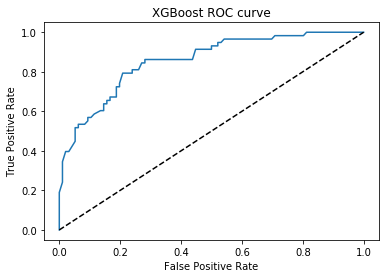

In [57]:
from sklearn.metrics import roc_curve  
probs = xgb_clf.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()